# ЮНИТ-10: Мини-проект
**Модуль 25. A/B-тестирование (HW-03)**

Скачать:
* Скачать sample a: https://lms-cdn.skillfactory.ru/assets/courseware/v1/458c3852d20031834c4d62a99ea424ef/asset-v1:SkillFactory+DSPRML+ALWAYS+type@asset+block/sample_a.zip

* Скачать sample b: https://lms-cdn.skillfactory.ru/assets/courseware/v1/b02dee68c33d49f27793522f89c50cab/asset-v1:SkillFactory+DSPRML+ALWAYS+type@asset+block/sample_b.zip

* Скачать sample c: https://lms-cdn.skillfactory.ru/assets/courseware/v1/a22e256e36aac4608cc65858614ccdbf/asset-v1:SkillFactory+DSPRML+ALWAYS+type@asset+block/sample_c.zip

* Скачать item_prices: https://lms-cdn.skillfactory.ru/assets/courseware/v1/c2567f1976c44ff69cc18057ba824dd4/asset-v1:SkillFactory+DSPRML+ALWAYS+type@asset+block/item_prices.zip

**ПОСТАНОВКА ЗАДАЧИ**

К вам попали результаты A/A/B-тестирования от одного известного маркетплейса.

> sample_a, sample_c — АА-группы, sample_b — отдельная группа.

В каждом датасете есть три типа действий пользователей: 0 — клик, 1 — просмотр и 2 — покупка (пользователь просматривает выдачу товаров, кликает на понравившийся товар и совершает покупку).

Маркетплейс ориентируется на следующие метрики:

* ctr (отношение кликов к просмотрам товаров);
* purchase rate (отношение покупок к просмотрам товаров);
* gmv (оборот, сумма произведений количества покупок на стоимость покупки), где считаем 1 сессию за 1 точку (1 сессия на 1 пользователя).

> Данные уже почищены по сессиям, вы можете использовать их в агрегированном виде. Ваша задача — понять, нет ли проблемы с разъезжанием сплитов и улучшает ли алгоритм B работу маркетплейса.

Тест Шапиро-Уилка проведите на $alpha = 0.01$.

**КРИТЕРИИ ОЦЕНИВАНИЯ**

* **2 балла**	Проведена проверка, что нет ситуаций, когда происходит покупка/клик без действия просмотра. Удалены дубли.
* **2 балла**	Рассчитаны метрики по датасетам, проведено общее сравнение метрик.
* **3 балла**	Проведён тест равенства долей для A и C групп по всем метрикам. Сделан вывод.
* **3 балла**	Проведён тест равенства долей для A и B групп по всем метрикам. Сделан вывод

**Подсказки**
> - Что важно как требование к чистоте данных?
> - Посмотрите внимательно на значения метрик!
> - «Разъезжаются» ли сплиты? Посмотрите на результаты A/A-теста.
> - Каков результат А/B-теста? можем ли мы на него положиться?

**Задание, оцениваемое ментором**
> Модуль 25. A/B-тестирование (HW-03)
> - Домашнее задание проверит ментор и поставит оценку. Если возникнут сложности, обращайтесь в канал модуля. Желаем успехов! ;)

### ИМПОРТ НУЖНЫХ БИБЛИОТЕК:

In [ ]:
# для работы с датафреймами:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# для загрузки данных из архивов по ссылкам:
import zipfile
import io

# для визуализации данных:
import matplotlib.pyplot as plt
import seaborn as sns

# для статистических тестов:
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import shapiro

# для работы с данными в Pandas
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder

### ЗАГРУЗКА ДАННЫХ ИЗ ДАТАСЕТОВ

In [ ]:
# загрузим данные - sample a:
!gdown --fuzzy https://drive.google.com/file/d/1d5-vtlCTHlKA5GOBLydruSWdVkrT6KQg/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1d5-vtlCTHlKA5GOBLydruSWdVkrT6KQg
To: /content/sample_a.zip
100% 5.57M/5.57M [00:00<00:00, 32.8MB/s]


In [ ]:
archive = zipfile.ZipFile('/content/sample_a.zip', 'r')
#archive.filelist
sample_a = archive.read('sample_a.csv')

In [ ]:
#Загрузка датасета:
df_sample_a = pd.read_csv(io.BytesIO(sample_a))
df_sample_a.head(3)

,user_id,item_id,action_id
0,84636,360,1
1,21217,9635,1
2,13445,8590,1


In [ ]:
# загрузим данные - sample b:
!gdown --fuzzy https://drive.google.com/file/d/1m9sqSo_P1DKsXYgmuhC4s03tLW86l9EU/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1m9sqSo_P1DKsXYgmuhC4s03tLW86l9EU
To: /content/sample_b.zip
100% 5.78M/5.78M [00:00<00:00, 39.3MB/s]


In [ ]:
archive = zipfile.ZipFile('/content/sample_b.zip', 'r')
#archive.filelist
sample_b = archive.read('sample_b.csv')

In [ ]:
#Загрузка датасета:
df_sample_b = pd.read_csv(io.BytesIO(sample_b))
df_sample_b.head(3)

,user_id,item_id,action_id
0,118375,4105,1
1,107569,8204,1
2,175990,880,1


In [ ]:
# загрузим данные - sample c:
!gdown --fuzzy https://drive.google.com/file/d/1yE25yToVa_1rqUDL_0B7Ug1byp77NcuV/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1yE25yToVa_1rqUDL_0B7Ug1byp77NcuV
To: /content/sample_c.zip
100% 5.81M/5.81M [00:00<00:00, 37.3MB/s]


In [ ]:
archive = zipfile.ZipFile('/content/sample_c.zip', 'r')
#archive.filelist
sample_c = archive.read('sample_c.csv')

In [ ]:
#Загрузка датасета:
df_sample_c = pd.read_csv(io.BytesIO(sample_c))
df_sample_c.head(3)

,user_id,item_id,action_id
0,274623,2863,1
1,265472,343,1
2,242779,6009,0


In [ ]:
# загрузим данные - item_prices:
!gdown --fuzzy https://drive.google.com/file/d/1RWnAO27Xu5wdDjZGKhWKnJ1WIyuChFzb/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1RWnAO27Xu5wdDjZGKhWKnJ1WIyuChFzb
To: /content/item_prices.zip
100% 4.98k/4.98k [00:00<00:00, 11.8MB/s]


In [ ]:
archive = zipfile.ZipFile('/content/item_prices.zip', 'r')
#archive.filelist
item_prices = archive.read('item_prices.csv')

In [ ]:
#Загрузка датасета:
df_item_prices = pd.read_csv(io.BytesIO(item_prices))
df_item_prices.head(3)

,item_id,item_price
0,338,1501
1,74,647
2,7696,825


### ВЫВОД-1: первичный взгляд на сплиты
* **на первый взгляд** в сплитах, относящихся в АА-группе одинаковое распределение записей по событиям: клик, просмотр, покупка

<Axes: >

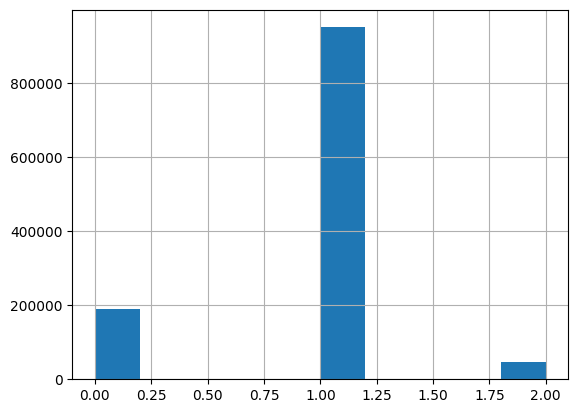

In [ ]:
# посмотрим распеределение действий в sample_a и sample_c:

df_sample_a.action_id.hist()

<Axes: >

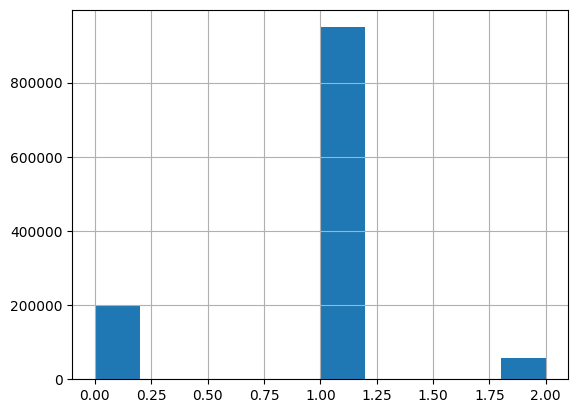

In [ ]:
df_sample_c.action_id.hist()

<Axes: >

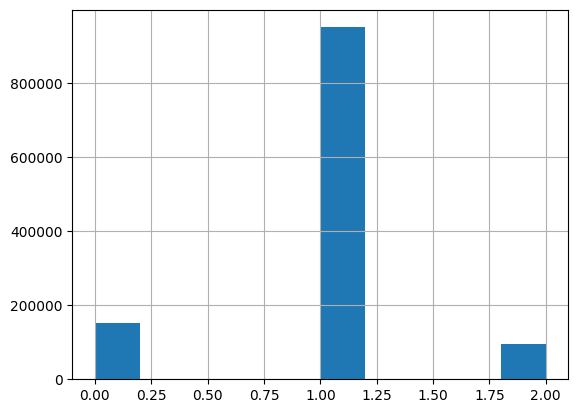

In [ ]:
# посмотрим распеределение действий в sample_b:

df_sample_b.action_id.hist()

### ВЫВОД-2: сколько уникальных записей по user_id
* есть ли в сплитах повторяющиеся user_id:

In [ ]:
print('всего записей в sample_a:', df_sample_a.shape, 'в т.ч. уникальных: ', df_sample_a.user_id.unique().shape)
print('всего записей в sample_c:', df_sample_c.shape, 'в т.ч. уникальных: ', df_sample_c.user_id.unique().shape)
print('\n')
print('всего записей в sample_b:', df_sample_b.shape, 'в т.ч. уникальных: ', df_sample_b.user_id.unique().shape)
print('всего записей в item_prices:', df_item_prices.shape, 'в т.ч. уникальных: ', df_item_prices.item_id.unique().shape)

всего записей в sample_a: (1188912, 3) в т.ч. уникальных:  (996,)
всего записей в sample_c: (1205510, 3) в т.ч. уникальных:  (994,)


всего записей в sample_b: (1198438, 3) в т.ч. уникальных:  (996,)
всего записей в item_prices: (1000, 2) в т.ч. уникальных:  (955,)


### ВЫВОД-3: есть ли дубли в исходных сплитах?
* есть ли в сплитах повторяющиеся user_id в сочетании с item_id и action_id:

In [ ]:
print('всего записей в sample_a:', df_sample_a.shape, 'в т.ч. уникальных: ', df_sample_a[df_sample_a.duplicated(['user_id','item_id','action_id'])].shape)
print('всего записей в sample_c:', df_sample_c.shape, 'в т.ч. уникальных: ', df_sample_c[df_sample_c.duplicated(['user_id','item_id','action_id'])].shape)
print('\n')
print('всего записей в sample_b:', df_sample_b.shape, 'в т.ч. уникальных: ', df_sample_b[df_sample_b.duplicated(['user_id','item_id','action_id'])].shape)

всего записей в sample_a: (1188912, 3) в т.ч. уникальных:  (0, 3)
всего записей в sample_c: (1205510, 3) в т.ч. уникальных:  (0, 3)


всего записей в sample_b: (1198438, 3) в т.ч. уникальных:  (0, 3)


> Дублей по трем признакам нет ни в одном сплите.
> - Дублем считаем запись, в которой повторяется user_id и item_id, а action_id принимает значение 0 и 2, 1 и 2, т.к. состояние "2" предполагает, что Пользователь сделал действие до покупки (клик и просмотр либо клик либо просмотр) и купил.

### ВЫВОД-4: вариант 1 - как определить дубли?
* сделаем выборку в каждом сплите с учетом дублей по двум признакам - user_id и item_id:

In [ ]:
duplicate_df_sample_a = df_sample_a[df_sample_a.duplicated(['user_id','item_id'])]
duplicate_df_sample_c = df_sample_c[df_sample_c.duplicated(['user_id','item_id'])]
duplicate_df_sample_b = df_sample_b[df_sample_b.duplicated(['user_id','item_id'])]

In [ ]:
print('Дублей по двум признакам в sample_a: ', len(duplicate_df_sample_a))
print('Дублей по двум признакам в sample_c: ', len(duplicate_df_sample_c))
print('Дублей по двум признакам в sample_b: ', len(duplicate_df_sample_b))

Дублей по двум признакам в sample_a:  237782
Дублей по двум признакам в sample_c:  256289
Дублей по двум признакам в sample_b:  247297


### ВЫВОД-5: вариант 2 - как определить дубли?
* посмотрим есть ли среди дублей сочетание действий по признаку action_id:
 * 0 и 2
 * 1 и 2

> для этого в каждом сплите сделаем фильтр с учетом условия выше по двум признакам user_id и item_id:

In [ ]:
print('Количество дублей в sample_a: ', duplicate_df_sample_a[(duplicate_df_sample_a.duplicated(['user_id','item_id']))&
 (((duplicate_df_sample_a['action_id']==1)|(duplicate_df_sample_a['action_id']==2))|
  ((duplicate_df_sample_a['action_id']==0)|(duplicate_df_sample_a['action_id']==2)))].shape[0])
print('Количество дублей в sample_c: ', duplicate_df_sample_c[(duplicate_df_sample_c.duplicated(['user_id','item_id']))&
 (((duplicate_df_sample_c['action_id']==1)|(duplicate_df_sample_c['action_id']==2))|
  ((duplicate_df_sample_c['action_id']==0)|(duplicate_df_sample_c['action_id']==2)))].shape[0])
print('********')
print('Количество дублей в sample_b: ', duplicate_df_sample_b[(duplicate_df_sample_b.duplicated(['user_id','item_id']))&
 (((duplicate_df_sample_b['action_id']==1)|(duplicate_df_sample_b['action_id']==2))|
  ((duplicate_df_sample_b['action_id']==0)|(duplicate_df_sample_b['action_id']==2)))].shape[0])

Количество дублей в sample_a:  9510
Количество дублей в sample_c:  11943
********
Количество дублей в sample_b:  15179


In [ ]:
# пример дублей:
duplicate_df_sample_a[(duplicate_df_sample_a['user_id']==46746) & (duplicate_df_sample_a['item_id']==4305)]

,user_id,item_id,action_id
8051,46746,4305,2
859605,46746,4305,1


### ВЫВОД-6: Удаляем дубли из сплитов

In [ ]:
duplicate_sample_a = duplicate_df_sample_a[(duplicate_df_sample_a.duplicated(['user_id','item_id']))&
 (((duplicate_df_sample_a['action_id']==1)|(duplicate_df_sample_a['action_id']==2))|
  ((duplicate_df_sample_a['action_id']==0)|(duplicate_df_sample_a['action_id']==2)))]

duplicate_sample_c = duplicate_df_sample_c[(duplicate_df_sample_c.duplicated(['user_id','item_id']))&
 (((duplicate_df_sample_c['action_id']==1)|(duplicate_df_sample_c['action_id']==2))|
  ((duplicate_df_sample_c['action_id']==0)|(duplicate_df_sample_c['action_id']==2)))]

duplicate_sample_b = duplicate_df_sample_b[(duplicate_df_sample_b.duplicated(['user_id','item_id']))&
 (((duplicate_df_sample_b['action_id']==1)|(duplicate_df_sample_b['action_id']==2))|
  ((duplicate_df_sample_b['action_id']==0)|(duplicate_df_sample_b['action_id']==2)))]

In [ ]:
data_a = df_sample_a.copy()
data_c = df_sample_c.copy()
data_b = df_sample_b.copy()

In [ ]:
df_a = data_a[~data_a.index.isin(duplicate_sample_a.index)]
df_c = data_c[~data_c.index.isin(duplicate_sample_c.index)]
df_b = data_b[~data_b.index.isin(duplicate_sample_b.index)]

print('Количество записей в sample_a без дублей: ', df_a.shape[0])
print('Количество записей в sample_a без дублей: ', df_c.shape[0])
print('Количество записей в sample_a без дублей: ', df_b.shape[0])

Количество записей в sample_a без дублей:  1179402
Количество записей в sample_a без дублей:  1193567
Количество записей в sample_a без дублей:  1183259


### ДОБАВИМ К КАЖДОМУ ДАТАСЕТУ СОИМОСТЬ ТОВАРОВ:

In [ ]:
prices = df_item_prices.copy()
df_a_m = df_a.copy()
print(df_a_m.shape)
df_a_m.head(3)

(1179402, 3)


,user_id,item_id,action_id
0,84636,360,1
1,21217,9635,1
2,13445,8590,1


In [ ]:
prices.set_index("item_id", drop=True, inplace=True)
dict_item_prices = prices.T.to_dict('list')

df_a_m['item_price'] = df_a_m['item_id'].map(dict_item_prices)
print(df_a_m.shape)
df_a_m.head(3)

(1179402, 4)


,user_id,item_id,action_id,item_price
0,84636,360,1,[1896]
1,21217,9635,1,[1699]
2,13445,8590,1,[846]


In [ ]:
df_a_m['item_price'] = df_a_m['item_price'].astype(object).astype(str)
df_a_m['item_price'] = df_a_m['item_price'].str.strip('[]').astype(float)
df_a_m['item_price'] = df_a_m['item_price'].astype(int)
df_a_m.head(3)
df_a_m.dtypes

user_id       int64
item_id       int64
action_id     int64
item_price    int64
dtype: object

In [ ]:
df_c_m = df_c.copy()
print(df_c_m.shape)
df_b_m = df_b.copy()
print(df_b_m.shape)

(1193567, 3)
(1183259, 3)


In [ ]:
df_c_m['item_price'] = df_c_m['item_id'].map(dict_item_prices)
df_b_m['item_price'] = df_b_m['item_id'].map(dict_item_prices)

In [ ]:
df_c_m['item_price'] = df_c_m['item_price'].astype(object).astype(str)
df_c_m['item_price'] = df_c_m['item_price'].str.strip('[]').astype(float)
df_c_m['item_price'] = df_c_m['item_price'].astype(int)
df_c_m.head(3)
df_c_m.dtypes

user_id       int64
item_id       int64
action_id     int64
item_price    int64
dtype: object

In [ ]:
df_b_m['item_price'] = df_b_m['item_price'].astype(object).astype(str)
df_b_m['item_price'] = df_b_m['item_price'].str.strip('[]').astype(float)
df_b_m['item_price'] = df_b_m['item_price'].astype(int)
df_b_m.head(3)
df_b_m.dtypes

user_id       int64
item_id       int64
action_id     int64
item_price    int64
dtype: object

### ВЫВОД-7: датасеты подготовлены для расчета метрик
> для каждого датасета определяем три метрики:
> - **ctr** (отношение кликов к просмотрам товаров);
> - **purchase rate** (отношение покупок к просмотрам товаров);
> - **gmv** (оборот, сумма произведений количества покупок на стоимость покупки), где считаем 1 сессию за 1 точку (1 сессия на 1 пользователя).

> **ВАРИАНТ кодирования**: не очень то и рабочий для решения задачи мини-проекта

In [ ]:
# Создание экземпляра класса OneHotEncoder()
#ohe_enc = OneHotEncoder()
# Кодирование признака в sample_a:
#ohe_res = ohe_enc.fit_transform(df_a_m[['action_id']])

#ohe_df = pd.DataFrame(ohe_res.toarray(), columns=list(*ohe_enc.categories_))
#df_a_m = pd.concat([df_a_m, ohe_df], axis=1)
#df_a_m.head(5)

,user_id,item_id,action_id,item_price,0,1,2
0,84636.0,360.0,1.0,1896.0,0.0,1.0,0.0
1,21217.0,9635.0,1.0,1699.0,0.0,1.0,0.0
2,13445.0,8590.0,1.0,846.0,0.0,1.0,0.0
3,38450.0,5585.0,1.0,1556.0,0.0,1.0,0.0
4,14160.0,2383.0,0.0,1956.0,1.0,0.0,0.0


> **ВАРИАНТ кодирования**: рабочий для решения задачи мини-проекта

In [ ]:
# Замена в сплите sample_a порядковых категориальных признаков методом map()
click =  {0.0: 1.0, 1.0: 0.0, 2.0: 0.0}
view =  {0.0: 0.0, 1.0: 1.0, 2.0: 0.0}
purchase =  {0.0: 0.0, 1.0: 0.0, 2.0: 1.0}
df_a_m['clicks'] = df_a_m['action_id'].map(click)
df_a_m['views'] = df_a_m['action_id'].map(view)
df_a_m['purchases'] = df_a_m['action_id'].map(purchase)
df_a_m.head(5)

,user_id,item_id,action_id,item_price,clicks,views,purchases
0,84636,360,1,1896,0.0,1.0,0.0
1,21217,9635,1,1699,0.0,1.0,0.0
2,13445,8590,1,846,0.0,1.0,0.0
3,38450,5585,1,1556,0.0,1.0,0.0
4,14160,2383,0,1956,1.0,0.0,0.0


In [ ]:
# Замена в сплите sample_c порядковых категориальных признаков методом map()
click =  {0.0: 1.0, 1.0: 0.0, 2.0: 0.0}
view =  {0.0: 0.0, 1.0: 1.0, 2.0: 0.0}
purchase =  {0.0: 0.0, 1.0: 0.0, 2.0: 1.0}
df_c_m['clicks'] = df_c_m['action_id'].map(click)
df_c_m['views'] = df_c_m['action_id'].map(view)
df_c_m['purchases'] = df_c_m['action_id'].map(purchase)
df_c_m.head(5)

,user_id,item_id,action_id,item_price,clicks,views,purchases
0,274623,2863,1,1283,0.0,1.0,0.0
1,265472,343,1,1196,0.0,1.0,0.0
2,242779,6009,0,1184,1.0,0.0,0.0
3,275009,2184,1,225,0.0,1.0,0.0
4,268104,3134,2,162,0.0,0.0,1.0


In [ ]:
# Замена в сплите sample_c порядковых категориальных признаков методом map()
click =  {0.0: 1.0, 1.0: 0.0, 2.0: 0.0}
view =  {0.0: 0.0, 1.0: 1.0, 2.0: 0.0}
purchase =  {0.0: 0.0, 1.0: 0.0, 2.0: 1.0}
df_b_m['clicks'] = df_b_m['action_id'].map(click)
df_b_m['views'] = df_b_m['action_id'].map(view)
df_b_m['purchases'] = df_b_m['action_id'].map(purchase)
df_b_m.head(5)

,user_id,item_id,action_id,item_price,clicks,views,purchases
0,118375,4105,1,536,0.0,1.0,0.0
1,107569,8204,1,1569,0.0,1.0,0.0
2,175990,880,1,846,0.0,1.0,0.0
3,160582,9568,0,1388,1.0,0.0,0.0
4,123400,4000,1,268,0.0,1.0,0.0


### РАСЧЕТ МЕТРИК по датасетам и общее сравнение метрик

In [ ]:
# делаем группировку в sample_a по Пользователю:
grouped_a = df_a_m.groupby(['user_id','item_id']).agg({
        'clicks': 'sum',
        'views': 'sum',
        'purchases': 'sum',
        'item_price':'sum'
        }).reset_index().rename(columns={'user_id': 'user',
                                         'item_id': 'item_id',
                                         'clicks': 'sum_clicks',
                                         'views': 'sum_views',
                                         'purchases': 'sum_purchases',
                                         'item_price': 'sum_price'})
grouped_a.head(5)

,user,item_id,sum_clicks,sum_views,sum_purchases,sum_price
0,241,21,0.0,1.0,0.0,452
1,241,36,0.0,1.0,0.0,282
2,241,39,0.0,1.0,0.0,1746
3,241,50,0.0,1.0,0.0,871
4,241,64,0.0,1.0,0.0,1479


In [ ]:
grouped_a['ctr'] = (grouped_a['sum_clicks'] +
                    grouped_a['sum_purchases'])/(grouped_a['sum_views']+
                                                 grouped_a['sum_purchases'])
grouped_a['purchase_rate'] = (grouped_a['sum_purchases'])/(grouped_a['sum_views']+
                                                           grouped_a['sum_purchases'])
grouped_a['gmv'] = (grouped_a['sum_purchases'])*grouped_a['sum_price']
grouped_a.sort_values(by='ctr', ascending=False).head(5)

,user,item_id,sum_clicks,sum_views,sum_purchases,sum_price,ctr,purchase_rate,gmv
858770,90425,2863,1.0,0.0,1.0,2566,2.0,1.0,2566.0
218484,22691,7941,1.0,0.0,1.0,742,2.0,1.0,742.0
243097,25469,5545,1.0,0.0,1.0,1232,2.0,1.0,1232.0
134503,14277,8438,1.0,0.0,1.0,720,2.0,1.0,720.0
134498,14277,8413,1.0,0.0,1.0,282,2.0,1.0,282.0


In [ ]:
# Группируем по пользователю и смотрим суммарный оборот за одну сессию:
grouped_a_users = grouped_a.groupby(['user']).agg({
    'item_id': 'count',
    'ctr': 'sum',
    'purchase_rate': 'sum',
    'gmv': 'sum'
    }).reset_index().rename(columns={'user': 'user',
                                     'item_id': 'item_id',
                                     'sum_clicks': 'sum_clicks',
                                     'sum_views': 'sum_views',
                                     'sum_purchases': 'sum_purchases',
                                     'sum_price': 'sum_price',
                                     'ctr': 'sum_ctr',
                                     'purchase_rate': 'sum_purchase_rate',
                                     'gmv': 'sum_gmv'})
grouped_a_users.head(5)

,user,item_id,sum_ctr,sum_purchase_rate,sum_gmv
0,241,955,198.0,22.0,91018.0
1,253,955,208.5,17.5,73518.0
2,362,955,200.0,24.0,113362.0
3,378,955,222.5,27.5,114584.0
4,475,955,219.0,25.0,98224.0


In [ ]:
# делаем группировку в sample_c по Пользователю:
grouped_c = df_c_m.groupby(['user_id','item_id']).agg({
        'clicks': 'sum',
        'views': 'sum',
        'purchases': 'sum',
        'item_price':'sum'
        }).reset_index().rename(columns={'user_id': 'user',
                                         'item_id': 'item_id',
                                         'clicks': 'sum_clicks',
                                         'views': 'sum_views',
                                         'purchases': 'sum_purchases',
                                         'item_price': 'sum_price'})
grouped_c.head(5)

,user,item_id,sum_clicks,sum_views,sum_purchases,sum_price
0,200225,21,0.0,1.0,0.0,452
1,200225,36,0.0,1.0,0.0,282
2,200225,39,1.0,1.0,0.0,3492
3,200225,50,0.0,1.0,0.0,871
4,200225,64,0.0,1.0,1.0,2958


In [ ]:
grouped_c['ctr'] = (grouped_c['sum_clicks'] +
                    grouped_c['sum_purchases'])/(grouped_c['sum_views']+
                                                 grouped_c['sum_purchases'])
grouped_c['purchase_rate'] = (grouped_c['sum_purchases'])/(grouped_c['sum_views']+
                                                           grouped_c['sum_purchases'])
grouped_c['gmv'] = (grouped_c['sum_purchases'])*grouped_c['sum_price']
grouped_c.sort_values(by='ctr', ascending=False).head(5)

,user,item_id,sum_clicks,sum_views,sum_purchases,sum_price,ctr,purchase_rate,gmv
351221,239925,7941,1.0,0.0,1.0,742,2.0,1.0,742.0
916136,296326,3559,1.0,0.0,1.0,892,2.0,1.0,892.0
259746,229895,21,1.0,0.0,1.0,904,2.0,1.0,904.0
447980,248206,1180,1.0,0.0,1.0,1164,2.0,1.0,1164.0
546877,257481,6732,1.0,0.0,1.0,3828,2.0,1.0,3828.0


In [ ]:
# Группируем по пользователю и смотрим суммарный оборот за одну сессию:
grouped_c_users = grouped_c.groupby(['user']).agg({
    'item_id': 'count',
    'ctr': 'sum',
    'purchase_rate': 'sum',
    'gmv': 'sum'
    }).reset_index().rename(columns={'user': 'user',
                                     'item_id': 'item_id',
                                     'sum_clicks': 'sum_clicks',
                                     'sum_views': 'sum_views',
                                     'sum_purchases': 'sum_purchases',
                                     'sum_price': 'sum_price',
                                     'ctr': 'sum_ctr',
                                     'purchase_rate': 'sum_purchase_rate',
                                     'gmv': 'sum_gmv'})
grouped_c_users.head(5)

,user,item_id,sum_ctr,sum_purchase_rate,sum_gmv
0,200225,955,216.5,25.5,94772.0
1,200278,955,226.0,28.0,102466.0
2,200282,955,234.5,34.5,156080.0
3,200325,955,201.5,21.5,95076.0
4,200441,954,224.0,25.0,100190.0


In [ ]:
# делаем группировку в sample_b по Пользователю:
grouped_b = df_b_m.groupby(['user_id','item_id']).agg({
        'clicks': 'sum',
        'views': 'sum',
        'purchases': 'sum',
        'item_price':'sum'
        }).reset_index().rename(columns={'user_id': 'user',
                                         'item_id': 'item_id',
                                         'clicks': 'sum_clicks',
                                         'views': 'sum_views',
                                         'purchases': 'sum_purchases',
                                         'item_price': 'sum_price'})
grouped_b.head(5)

,user,item_id,sum_clicks,sum_views,sum_purchases,sum_price
0,100038,21,0.0,1.0,0.0,452
1,100038,36,0.0,1.0,0.0,282
2,100038,39,0.0,1.0,0.0,1746
3,100038,50,0.0,1.0,0.0,871
4,100038,64,0.0,1.0,0.0,1479


In [ ]:
grouped_b['ctr'] = (grouped_b['sum_clicks'] +
                    grouped_b['sum_purchases'])/(grouped_b['sum_views']+
                                                 grouped_b['sum_purchases'])
grouped_b['purchase_rate'] = (grouped_b['sum_purchases'])/(grouped_b['sum_views']+
                                                           grouped_b['sum_purchases'])
grouped_b['gmv'] = (grouped_b['sum_purchases'])*grouped_b['sum_price']
grouped_b.sort_values(by='ctr', ascending=False).head(5)

,user,item_id,sum_clicks,sum_views,sum_purchases,sum_price,ctr,purchase_rate,gmv
846791,187876,7332,1.0,0.0,1.0,418,2.0,1.0,418.0
803673,183535,5699,1.0,0.0,1.0,1178,2.0,1.0,1178.0
764888,179894,9680,1.0,0.0,1.0,1256,2.0,1.0,1256.0
754648,178424,2470,1.0,0.0,1.0,3050,2.0,1.0,3050.0
116008,112819,4550,1.0,0.0,1.0,800,2.0,1.0,800.0


In [ ]:
# Группируем по пользователю и смотрим суммарный оборот за одну сессию:
grouped_b_users = grouped_b.groupby(['user']).agg({
    'item_id': 'count',
    'ctr': 'sum',
    'purchase_rate': 'sum',
    'gmv': 'sum'
    }).reset_index().rename(columns={'user': 'user',
                                     'item_id': 'item_id',
                                     'sum_clicks': 'sum_clicks',
                                     'sum_views': 'sum_views',
                                     'sum_purchases': 'sum_purchases',
                                     'sum_price': 'sum_price',
                                     'ctr': 'sum_ctr',
                                     'purchase_rate': 'sum_purchase_rate',
                                     'gmv': 'sum_gmv'})
grouped_b_users.head(5)

,user,item_id,sum_ctr,sum_purchase_rate,sum_gmv
0,100038,955,211.5,50.5,195536.0
1,100099,955,211.5,57.5,239580.0
2,100164,955,188.0,50.0,196904.0
3,100321,955,221.5,46.5,183952.0
4,100397,955,190.0,43.0,178594.0


> ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЯ по каждой метрики:

Text(0.5, 0, 'Значение метрики ctr')

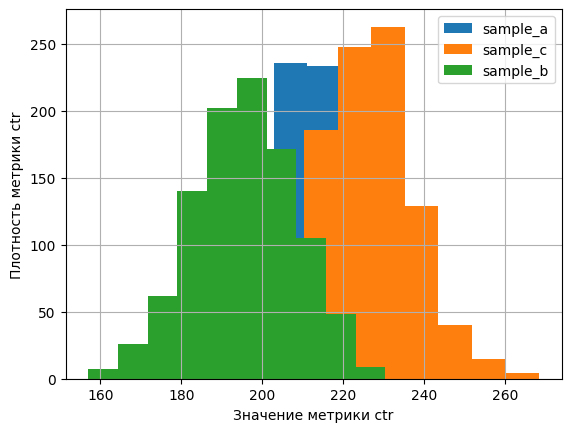

In [ ]:
names = ['sample_a', 'sample_c', 'sample_b']
grouped_a_users.sum_ctr.hist()
grouped_c_users.sum_ctr.hist()
grouped_b_users.sum_ctr.hist()
# Plot formatting
plt.legend([names[0], names[1], names[2]])
plt.ylabel('Плотность метрики ctr')
plt.xlabel('Значение метрики ctr')

Text(0.5, 0, 'Значение метрики purchase_rate')

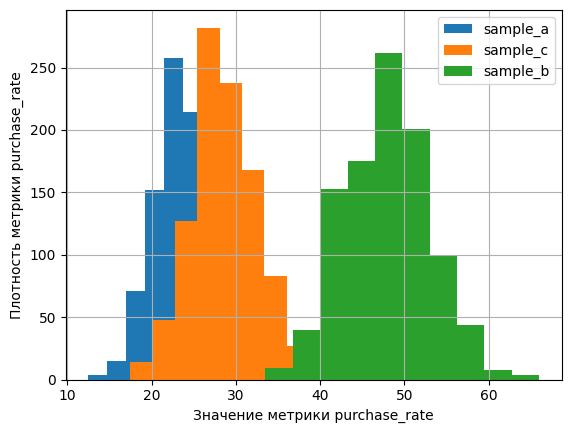

In [ ]:
names = ['sample_a', 'sample_c', 'sample_b']
grouped_a_users.sum_purchase_rate.hist()
grouped_c_users.sum_purchase_rate.hist()
grouped_b_users.sum_purchase_rate.hist()
# Plot formatting
plt.legend([names[0], names[1], names[2]])
plt.ylabel('Плотность метрики purchase_rate')
plt.xlabel('Значение метрики purchase_rate')

Text(0.5, 0, 'Значение метрики gmv')

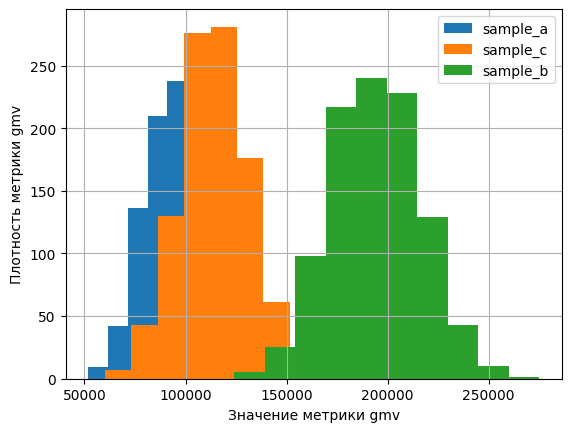

In [ ]:
names = ['sample_a', 'sample_c', 'sample_b']
grouped_a_users.sum_gmv.hist()
grouped_c_users.sum_gmv.hist()
grouped_b_users.sum_gmv.hist()
# Plot formatting
plt.legend([names[0], names[1], names[2]])
plt.ylabel('Плотность метрики gmv')
plt.xlabel('Значение метрики gmv')

### ВЫВОД-8:
> визуальное сравнение сплитов **по трем группам А, С, В** показывает такие результаты:
> - сравнение по метрике **ctr**: группа В имеет смещение влево, можно предположить, что пользователи меньше делают кликов по товарам;
> - сравнение по метрике **purchase rate** и метрике **gmv**: группа В имеет визуальное преимущество, т.к. можно предположить, что пользователи больше внимания обращают на товары и стремятся их приобрести.

> **группы А и С** имеют, визуально, практически одинаковое распределение по трем метрикам; наблюдается небольшой сдвиг группы С вправо.

> **сделаем расчет значений p-value** при сравнении групп: А и С, А и В.

> **СРАВНЕНИЕ МЕТРИК между А и С** группами:
Тест Шапиро-Уилка проведите на $alpha=0.01$.

In [ ]:
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.01 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(grouped_a_users['sum_ctr'])
shapiro_result_c = shapiro(grouped_c_users['sum_ctr'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы C', round(shapiro_result_c.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_c.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value группы А 0.15
p-value группы C 0.26
Принимаем нулевую гипотезу. Распределения в обеих группах нормальные


> **СРАВНЕНИЕ МЕТРИК между А и B** группами:
Тест Шапиро-Уилка проведите на $alpha=0.01$.

In [ ]:
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.01 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(grouped_a_users['sum_ctr'])
shapiro_result_b = shapiro(grouped_b_users['sum_ctr'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value группы А 0.15
p-value группы B 0.51
Принимаем нулевую гипотезу. Распределения в обеих группах нормальные


считаем метрики и оцениваем распределение этих метрик по Шапиро-Уилку, потом переходим к z-тесту для сравнения с другой группой
> **Z-тест для каждой из групп А, С, B**: принимаем $alpha=0.01$.

In [ ]:
A_ctr, C_ctr, B_ctr = grouped_a_users['sum_ctr'].sum(), grouped_c_users['sum_ctr'].sum(), grouped_b_users['sum_ctr'].sum()
A_rate, C_rate, B_rate = grouped_a_users['sum_purchase_rate'].sum(), grouped_c_users['sum_purchase_rate'].sum(), grouped_b_users['sum_purchase_rate'].sum()
A_gmv, C_gmv, B_gmv = grouped_a_users['sum_gmv'].sum(), grouped_c_users['sum_gmv'].sum(), grouped_b_users['sum_gmv'].sum()
A_users, C_users, B_users = grouped_a_users['user'].count(), grouped_c_users['user'].count(), grouped_b_users['user'].count()

In [ ]:
# создаем новый датасет включающий итоговые суммарные значения для каждой из трех групп:

sum_groups_metrics=pd.DataFrame({'group ':['A', 'C', 'B'],
                                 'count_users': [A_users, C_users, B_users],
                                 'sum_ctr': [A_ctr, C_ctr, B_ctr],
                                 'sum_purchase_rate': [A_rate, C_rate, B_rate],
                                 'sum_gmv': [A_gmv, C_gmv, B_gmv]})
sum_groups_metrics.head()

,group,count_users,sum_ctr,sum_purchase_rate,sum_gmv
0,A,996,210882.0,23784.0,95477914.0
1,C,994,223798.5,28463.5,113887566.0
2,B,996,194831.5,47642.5,193686700.0


In [ ]:
# нулевая и альтернативная гипотезы для группы А и С:
H0 = 'Конверсии в группах А и С равны по метрике ctr'
H1 = 'Конверсия в группе А больше, чем конверсия в группе С по метрике ctr'
alpha = 0.01 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=sum_groups_metrics['count_users'][0:2], #число ctr
    nobs=sum_groups_metrics['sum_ctr'][0:2], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value:  0.08
Принимаем нулевую гипотезу. Конверсии в группах А и С равны по метрике ctr


In [ ]:
# нулевая и альтернативная гипотезы для группы А и С:
H0 = 'Конверсии в группах А и С равны по метрике purchase_rate'
H1 = 'Конверсия в группе А меньше, чем конверсия в группе С по метрике purchase_rate'
alpha = 0.01 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=sum_groups_metrics['count_users'][0:2], #число ctr
    nobs=sum_groups_metrics['sum_purchase_rate'][0:2], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value:  0.0
Отвергаем нулевую гипотезу. Конверсии в группах А и С равны по метрике purchase_rate
Альтернативная гипотеза. H1: Конверсия в группе А больше, чем конверсия в группе С по метрике purchase_rate


In [ ]:
# нулевая и альтернативная гипотезы для группы А и С:
H0 = 'Конверсии в группах А и С равны по метрике gmv'
H1 = 'Конверсия в группе А меньше, чем конверсия в группе С по метрике gmv'
alpha = 0.01 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=sum_groups_metrics['count_users'][0:2], #число ctr
    nobs=sum_groups_metrics['sum_gmv'][0:2], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value:  0.0
Отвергаем нулевую гипотезу. Конверсии в группах А и С равны по метрике gmv
Альтернативная гипотеза. H1: Конверсия в группе А меньше, чем конверсия в группе С по метрике gmv


In [ ]:
sum_groups_metrics['count_users'][0], sum_groups_metrics['count_users'][2]

(996, 996)

In [ ]:
# нулевая и альтернативная гипотезы для группы А и B:
H0 = 'Конверсии в группах А и B равны по метрике ctr'
H1 = 'Конверсия в группе А больше, чем конверсия в группе B по метрике ctr'
alpha = 0.01 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=[sum_groups_metrics['count_users'][0], sum_groups_metrics['count_users'][2]], #число ctr
    nobs=[sum_groups_metrics['sum_ctr'][0], sum_groups_metrics['sum_ctr'][2]], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value:  0.96
Принимаем нулевую гипотезу. Конверсии в группах А и B равны по метрике ctr


In [ ]:
# нулевая и альтернативная гипотезы для группы А и B:
H0 = 'Конверсии в группах А и B равны по метрике purchase_rate'
H1 = 'Конверсия в группе А меньше, чем конверсия в группе B по метрике purchase_rate'
alpha = 0.01 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=[sum_groups_metrics['count_users'][0], sum_groups_metrics['count_users'][2]], #число ctr
    nobs=[sum_groups_metrics['sum_purchase_rate'][0],sum_groups_metrics['sum_purchase_rate'][2]], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value:  0.0
Отвергаем нулевую гипотезу. Конверсии в группах А и B равны по метрике purchase_rate
Альтернативная гипотеза. H1: Конверсия в группе А меньше, чем конверсия в группе B по метрике purchase_rate


In [ ]:
# нулевая и альтернативная гипотезы для группы А и B:
H0 = 'Конверсии в группах А и B равны по метрике gmv'
H1 = 'Конверсия в группе А меньше, чем конверсия в группе B по метрике gmv'
alpha = 0.01 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=[sum_groups_metrics['count_users'][0], sum_groups_metrics['count_users'][2]], #число ctr
    nobs=[sum_groups_metrics['sum_gmv'][0], sum_groups_metrics['sum_gmv'][2]], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value:  0.0
Отвергаем нулевую гипотезу. Конверсии в группах А и B равны по метрике gmv
Альтернативная гипотеза. H1: Конверсия в группе А меньше, чем конверсия в группе B по метрике gmv


## ОБЩИЕ ВЫВОДЫ по МИНИ-ПРОЕКТУ:
> * группы А и С практически равнозначные, но по метрике purchase_rate и gmv группа С смещена вправо
> * группы А и B различны по метрике purchase_rate и gmv группа B имеет сильное смещение вправо, что может говорить о нацеленности решения, показанного группе B на покупку просмотренного товара, т.е. повышение среднего чека на маркетплейсе
> * в целом, распределение данных в группе А, С, В имеют нормальный характер, что подтверждается расчетом статистик.